## Supplemental figures

In [17]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

Log simulation

In [ ]:
# Define true mortality rates
young_rate = 0.0004
middle_rate = 0.004
old_rate = 0.2

rates = np.array([young_rate, middle_rate, old_rate])
age_labels = ['Young', 'Middle-aged', 'Old']

# Convert to log scale
log_rates = np.log(rates)

# Simulate model prediction with fixed error in log space
log_error_value = 0.2
log_preds = log_rates + log_error_value

# Convert predictions back to original scale
predicted_rates = np.exp(log_preds)

# Compute log error and absolute error
log_errors = log_preds - log_rates
abs_errors = np.abs(predicted_rates - rates)

# Create DataFrame
df = pd.DataFrame({
    'Age Group': age_labels,
    'True Rate': rates,
    'Predicted Rate': predicted_rates,
    'Log Error': log_errors,
    'Absolute Error': abs_errors
})

# Round for nicer table formatting
df_rounded = df.copy()
df_rounded[['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']] = df_rounded[
    ['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']
].round(6)

# Output LaTeX code
latex_table = df_rounded.to_latex(index=False, caption="Errors from log-scale mortality prediction.", label="tab:log_error_example")
print(latex_table)

Actual vs predicted rates 

Long-run forecasts

In [9]:
country_test = np.loadtxt('../../data/country_test.txt')

Get 100 year predictions for DL (and load 100 year predictions from other models)

In [10]:
# loading a single model for long run predictions 
# not as robust but okay for a supplemental figure
all_country_model = keras.models.load_model("../../models/dl_country_model_1.keras")

years = np.arange(2006, 2106)
ages = np.unique(country_test[:, 3])
genders = np.unique(country_test[:, 1])
countries = np.unique(country_test[:, 0])

C, G, Y, A = np.meshgrid(countries, genders, years, ages, indexing="ij")
features = np.stack([C.ravel(), G.ravel(), Y.ravel(),  A.ravel()], axis=1).astype(object)
print(features.shape)

input_features_for_100_year = (tf.convert_to_tensor((features[:,2] - 1959) / 60, dtype=tf.float32),  # Normalized year
                        tf.convert_to_tensor(features[:,3], dtype=tf.float32),  # Age
                        tf.convert_to_tensor(features[:,0], dtype=tf.float32),  # Geography
                        tf.convert_to_tensor(features[:,1], dtype=tf.float32))  # Gender

(800000, 4)


In [11]:
dl_preds_100_year = all_country_model.predict(input_features_for_100_year)
dl_preds_100_year = np.column_stack((features, dl_preds_100_year))
np.savetxt(f"supp_data/dl_100_year_forecasts.txt", dl_preds_100_year)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 7s 288us/step


In [14]:
coh_preds_100_year = np.loadtxt("supp_data/coherent_forecast_100_year.csv", delimiter=",")
hu_preds_100_year = np.loadtxt("supp_data/hu_forecast_100_year.csv", delimiter=",")
lc_preds_100_year = np.loadtxt("supp_data/lc_forecast_100_year.csv", delimiter=",")

In [29]:
lc_preds_100_year

array([[5.00000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        3.52962376e-03],
       [5.00000000e+01, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        3.40930142e-03],
       [5.00000000e+01, 0.00000000e+00, 3.00000000e+00, 0.00000000e+00,
        3.29308078e-03],
       ...,
       [8.90000000e+01, 1.00000000e+00, 9.80000000e+01, 9.90000000e+01,
        5.93060313e-01],
       [8.90000000e+01, 1.00000000e+00, 9.90000000e+01, 9.90000000e+01,
        5.94948503e-01],
       [8.90000000e+01, 1.00000000e+00, 1.00000000e+02, 9.90000000e+01,
        5.96842703e-01]], shape=(800000, 5))

In [25]:
# exponentiate dl preds to match others 
dl_preds_100_year_exp = dl_preds_100_year.copy()
dl_preds_100_year_exp[:,4] = np.exp(dl_preds_100_year[:,4].astype(float))

In [ ]:
dl_age_80_f_AUS = dl_test_pred_100[(dl_test_pred_100[:,1] == 0) & (dl_test_pred_100[:,3] == i) & (dl_test_pred_100[:,0] == 88)]
hu_age_80_f_AUS = hu_test_pred_100[(hu_test_pred_100[:,1] == 0) & (hu_test_pred_100[:,3] == i) & (hu_test_pred_100[:,0] == 88)]
coh_age_80_f_AUS = coh_test_pred_100[(coh_test_pred_100[:,1] == 0) & (coh_test_pred_100[:,3] == i) & (coh_test_pred_100[:,0] == 88)]
country_test_80_f_AUS = country_test[(country_test[:,1] == 0) & (country_test[:,3] == i) & (country_test[:,0] == 88)]


In [6]:
geos = np.load('../../data/geos_key.npy')

In [53]:
geos

array([['AK', '0'],
       ['AL', '1'],
       ['AZ', '2'],
       ['AR', '3'],
       ['CA', '4'],
       ['CO', '5'],
       ['CT', '6'],
       ['DE', '7'],
       ['FL', '8'],
       ['GA', '9'],
       ['HI', '10'],
       ['ID', '11'],
       ['IL', '12'],
       ['IN', '13'],
       ['IA', '14'],
       ['KS', '15'],
       ['KY', '16'],
       ['LA', '17'],
       ['ME', '18'],
       ['MD', '19'],
       ['MA', '20'],
       ['MI', '21'],
       ['MN', '22'],
       ['MS', '23'],
       ['MO', '24'],
       ['MT', '25'],
       ['NE', '26'],
       ['NV', '27'],
       ['NH', '28'],
       ['NJ', '29'],
       ['NM', '30'],
       ['NY', '31'],
       ['NC', '32'],
       ['ND', '33'],
       ['OH', '34'],
       ['OK', '35'],
       ['OR', '36'],
       ['PA', '37'],
       ['RI', '38'],
       ['SC', '39'],
       ['SD', '40'],
       ['TN', '41'],
       ['TX', '42'],
       ['UT', '43'],
       ['VT', '44'],
       ['VA', '45'],
       ['WA', '46'],
       ['WV', '47'],
  

In [33]:
preds_list = [dl_preds_100_year_exp, hu_preds_100_year, coh_preds_100_year, country_test]#, lc_preds_100_year]
age_list = [80, 60, 40]
country_list = [88, 89, 59] # Ukraine, US, West Germany

In [41]:
geos[:,0][geos[:,1]=='88']

array(['UKR'], dtype='<U21')

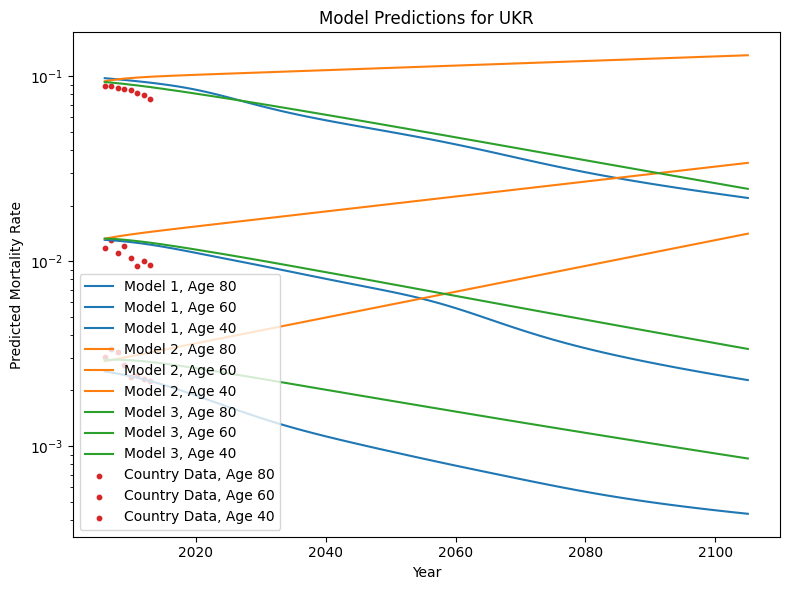

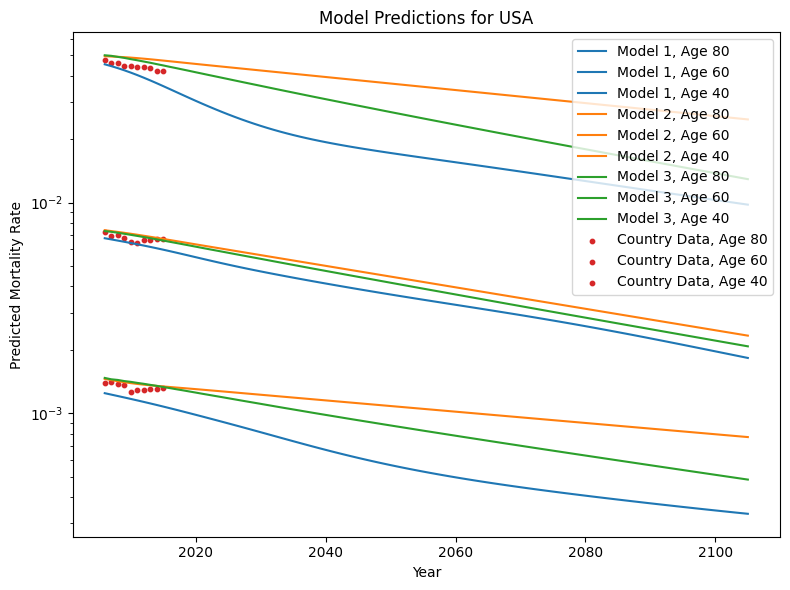

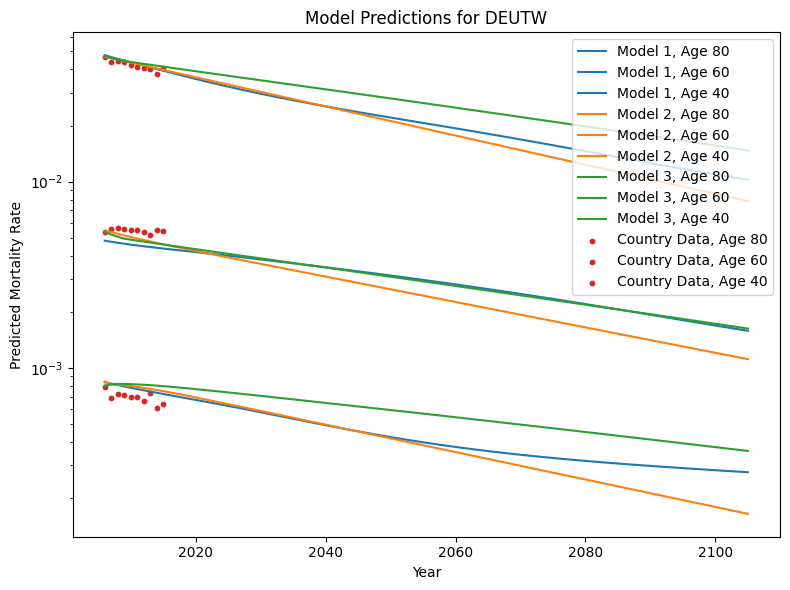

In [52]:
import matplotlib.pyplot as plt
import itertools

# Define line styles or markers for ages
#line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # add more if needed

# Define a color cycle for models (Matplotlib automatically cycles colors)
colors = plt.cm.tab10.colors  # 10 distinct colors

for country in country_list:
    plt.figure(figsize=(8, 6))

    # Loop through models (assign color) and ages (assign line style)
    for model_idx, model_preds in enumerate(preds_list):
        color = colors[model_idx % len(colors)]  # one color per model

        for age_idx, age in enumerate(age_list):
            #style = line_styles[age_idx % len(line_styles)]
            preds_subset = model_preds[
                (model_preds[:, 1] == 0) &
                (model_preds[:, 3] == age) &
                (model_preds[:, 0] == country)
            ]
            if model_idx == 3:  # Country data:
                plt.scatter(
                    preds_subset[:, 2],
                    preds_subset[:, 4],
                    s=10,
                    color=color,
                    label=f"Country Data, Age {age}"
                )
            else:
                plt.plot(
                    preds_subset[:, 2],
                    preds_subset[:, 4],
                    #style,
                    color=color,
                    label=f"Model {model_idx+1}, Age {age}"
                )

    plt.title(f"Model Predictions for {geos[geos[:,1]==str(country), 0][0]}")
    plt.xlabel("Year")
    plt.ylabel("Predicted Mortality Rate")
    plt.yscale("log")
    plt.legend()
    plt.tight_layout()
    plt.show()


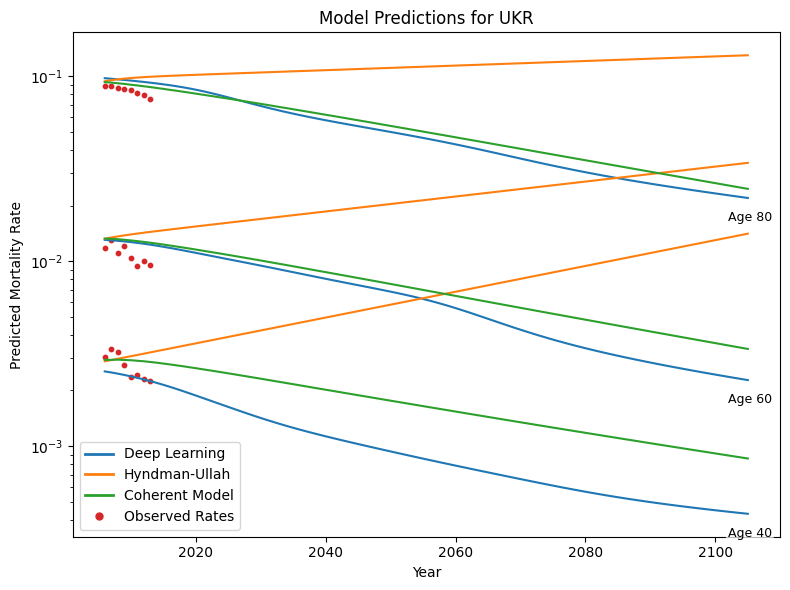

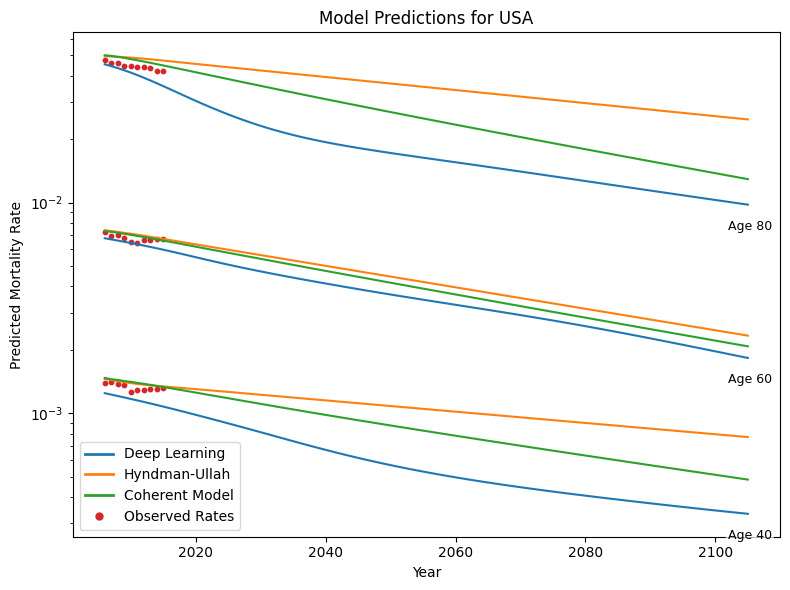

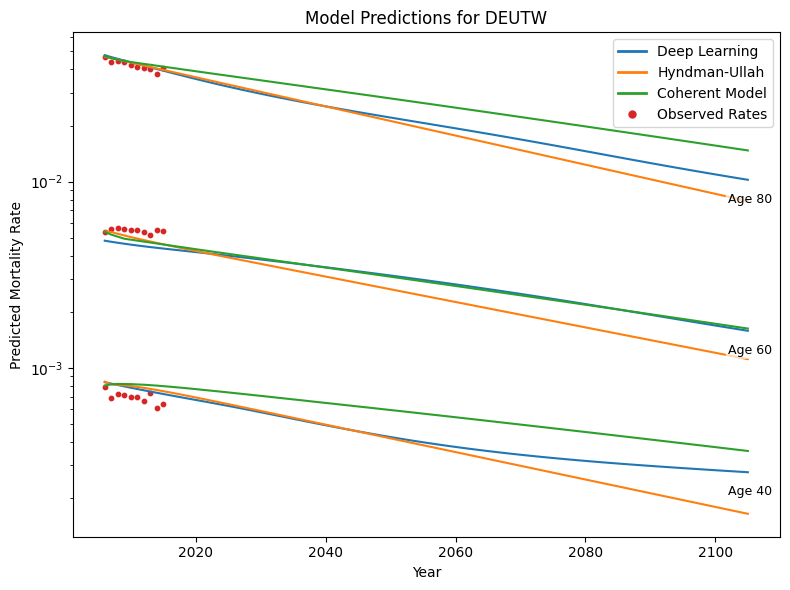

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

colors = plt.cm.tab10.colors
COUNTRY_IDX = 3

for country in country_list:
    fig, ax = plt.subplots(figsize=(8, 6))

    # ---- plot lines/scatter ----
    for model_idx, model_preds in enumerate(preds_list):
        color = colors[model_idx % len(colors)]

        for age_idx, age in enumerate(age_list):
            mask = (
                (model_preds[:, 1] == 0) &
                (model_preds[:, 3] == age) &
                (model_preds[:, 0] == country)
            )
            preds_subset = model_preds[mask]
            if preds_subset.size == 0:
                continue

            x = preds_subset[:, 2]
            y = preds_subset[:, 4]

            if model_idx == COUNTRY_IDX:
                ax.scatter(x, y, s=10, color=color)
            else:
                ax.plot(x, y, color=color, linewidth=1.5)

    # ---- inline labels underneath the lines ----
    for j, age in enumerate(age_list):
        placed = False
        for pick_idx in ([0] + [i for i in range(len(preds_list)) if i != 0]):
            mp = preds_list[pick_idx]
            mask = (
                (mp[:, 1] == 0) &
                (mp[:, 3] == age) &
                (mp[:, 0] == country)
            )
            subset = mp[mask]
            if subset.size == 0:
                continue

            order = np.argsort(subset[:, 2])
            x_last = subset[order[-1], 2]
            y_last = subset[order[-1], 4]

            # shift label downward in log space (multiplicative)
            y_offset = y_last * 0.85  # 15% lower
            # small horizontal jitter to prevent overlap
            x_offset = x_last + 0.3  

            ax.annotate(
                f"Age {int(age)}",
                xy=(x_offset, y_offset),
                ha="center",
                va="top",
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.15", facecolor="white", alpha=0.7, linewidth=0),
                clip_on=False,
            )
            placed = True
            break

    # ---- legend (one entry per model + country data) ----
    models = ['Deep Learning', 'Hyndman-Ullah', 'Coherent Model']
    model_handles = [
        Line2D([], [], color=colors[m % len(colors)], linewidth=2, label=f"{models[m]}")
        for m in range(len(preds_list)) if m != COUNTRY_IDX
    ]
    country_handle = Line2D([], [], color=colors[COUNTRY_IDX % len(colors)],
                            marker='o', linestyle='None', markersize=5, label="Observed Rates")
    handles = model_handles + [country_handle]
    ax.legend(handles=handles, frameon=True)

    ax.set_title(f"Model Predictions for {geos[geos[:,1]==str(country), 0][0]}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Predicted Mortality Rate")
    ax.set_yscale("log")
    fig.tight_layout()
    plt.show()


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dl_age_80_f_AUS[:,2], np.exp(dl_age_80_f_AUS[:,4]), label='DL Model', color='blue')
#plt.plot(dl_age_80_f_AUS[:,2], dl_age_80_f_AUS[:,4], label='DL Model', color='blue')
plt.scatter(hu_age_80_f_AUS[:,2], hu_age_80_f_AUS[:,4], label='HU Model', color='orange')
#plt.plot(np.int64(hu_age_80_f_AUS[:,2]), np.log(hu_age_80_f_AUS[:,4]), label='HU Model', color='orange')
plt.scatter(coh_age_80_f_AUS[:,2], coh_age_80_f_AUS[:,4], label='Coherent Model', color='green')
plt.scatter(country_test_80_f_AUS[:,2], country_test_80_f_AUS[:,4], label='Actual', color='red')
plt.xlabel('Year')
plt.ylabel('Predicted Mortality')
plt.title(f'Predicted Mortality for Age {i} Female in Australia')
#plt.xlim(2020, 2030)
#plt.ylim(.018,.02)
plt.legend()
plt.grid()
plt.show()